# Download Files

In [2]:
import requests
import os
from tqdm import tqdm

def download_file(url, filename):
    """
    Download a file from a URL with progress bar
    """
    response = requests.get(url, stream=True)
    total_size = int(response.headers.get('content-length', 0))
    
    with open(filename, 'wb') as f, tqdm(
        desc=filename,
        total=total_size,
        unit='iB',
        unit_scale=True,
        unit_divisor=1024,
    ) as bar:
        for data in response.iter_content(chunk_size=1024):
            size = f.write(data)
            bar.update(size)

# MovieLens dataset (100k is a good starting point)
dataset_url = "https://files.grouplens.org/datasets/movielens/ml-latest-small.zip"
dataset_path = "../data/ml-latest-small.zip"

# Create data directory if it doesn't exist
os.makedirs("../data", exist_ok=True)

# Download the dataset
print("Downloading dataset...")
download_file(dataset_url, dataset_path)
print("Download complete!")

../data/ml-latest-small.zip: 100%|██████████| 955k/955k [00:02<00:00, 407kiB/s]  

Download complete!


# Unzip the Data

In [3]:
## 2. Unzip the dataset
import zipfile

print("Extracting dataset...")
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall("../data")
print("Extraction complete!")

Extracting dataset...
Extraction complete!


# Read the Data using Pandas

In [5]:
## 3. Load data into pandas
import pandas as pd

# Load movies data
movies = pd.read_csv("../data/ml-latest-small/movies.csv")

# Load ratings data
ratings = pd.read_csv("../data/ml-latest-small/ratings.csv")

# Load tags data (if available)
try:
    tags = pd.read_csv("../data/ml-latest-small/tags.csv")
except FileNotFoundError:
    print("\nNo tags data found")

In [6]:
## 4. Basic Data Analysis
print("\nBasic Statistics:")

# Movies stats
print("\nMovies stats:")
print(f"Total movies: {len(movies)}")
print(f"Genres: {movies['genres'].str.split('|').explode().unique()}")

# Ratings stats
print("\nRatings stats:")
print(ratings['rating'].describe())

# Number of ratings per movie
ratings_per_movie = ratings.groupby('movieId').size()
print("\nRatings per movie stats:")
print(ratings_per_movie.describe())


Basic Statistics:

Movies stats:
Total movies: 9742
Genres: ['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'War' 'Musical'
 'Documentary' 'IMAX' 'Western' 'Film-Noir' '(no genres listed)']

Ratings stats:
count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

Ratings per movie stats:
count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
dtype: float64


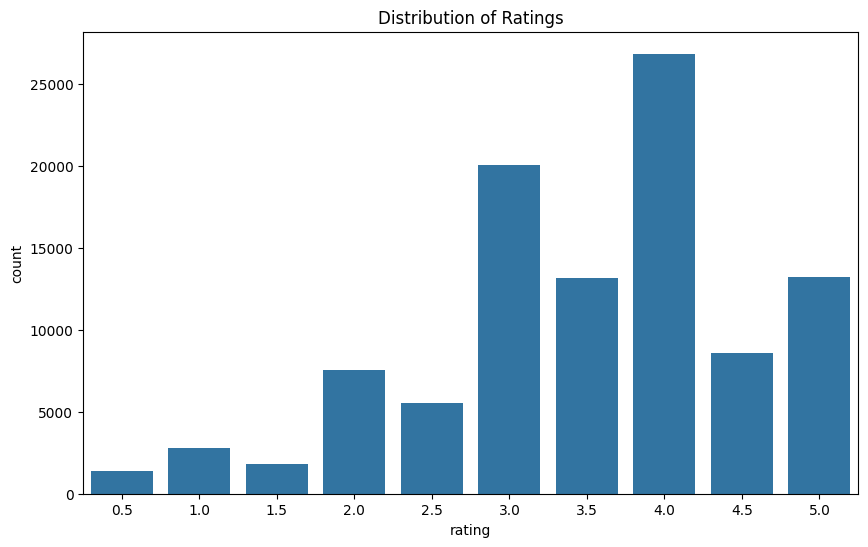


Top 10 movies with at least 10 ratings:
                                         title            genres  avg_rating  \
movieId                                                                        
1041                     Secrets & Lies (1996)             Drama    4.590909   
3451       Guess Who's Coming to Dinner (1967)             Drama    4.545455   
1178                     Paths of Glory (1957)         Drama|War    4.541667   
1104          Streetcar Named Desire, A (1951)             Drama    4.475000   
2360          Celebration, The (Festen) (1998)             Drama    4.458333   
1217                                Ran (1985)         Drama|War    4.433333   
318           Shawshank Redemption, The (1994)       Crime|Drama    4.429022   
951                     His Girl Friday (1940)    Comedy|Romance    4.392857   
1927     All Quiet on the Western Front (1930)  Action|Drama|War    4.350000   
3468                       Hustler, The (1961)             Drama    4.333333   

In [7]:
## 5. Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Rating distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings)
plt.title('Distribution of Ratings')
plt.show()

# Top rated movies (by average rating with minimum votes)
min_votes = 10
movie_stats = ratings.groupby('movieId').agg(
    avg_rating=('rating', 'mean'),
    num_ratings=('rating', 'count')
).join(movies.set_index('movieId'))

top_movies = movie_stats[movie_stats['num_ratings'] >= min_votes].sort_values('avg_rating', ascending=False)
print("\nTop 10 movies with at least 10 ratings:")
print(top_movies[['title', 'genres', 'avg_rating', 'num_ratings']].head(10))